<a href="https://colab.research.google.com/github/benjaminsw/Generalised_Linear_Models/blob/main/R_carbohydrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
if (!require('gsheet')) install.packages('gsheet'); library('gsheet')

#plot size
options(repr.plot.width=20, repr.plot.height=10)

In [5]:
# Read in data
url <- 'https://docs.google.com/spreadsheets/d/1wFGXHfcrVKMybtffrnMULbBBYBBHh0xigsHyFKRq9ew/edit?usp=sharing'
carb <- gsheet2tbl(url)
head(carb)

carbohydrate,age,weight,protein
<dbl>,<dbl>,<dbl>,<dbl>
33,33,100,14
40,47,92,15
37,49,135,18
27,35,144,12
30,46,140,15
43,52,101,15


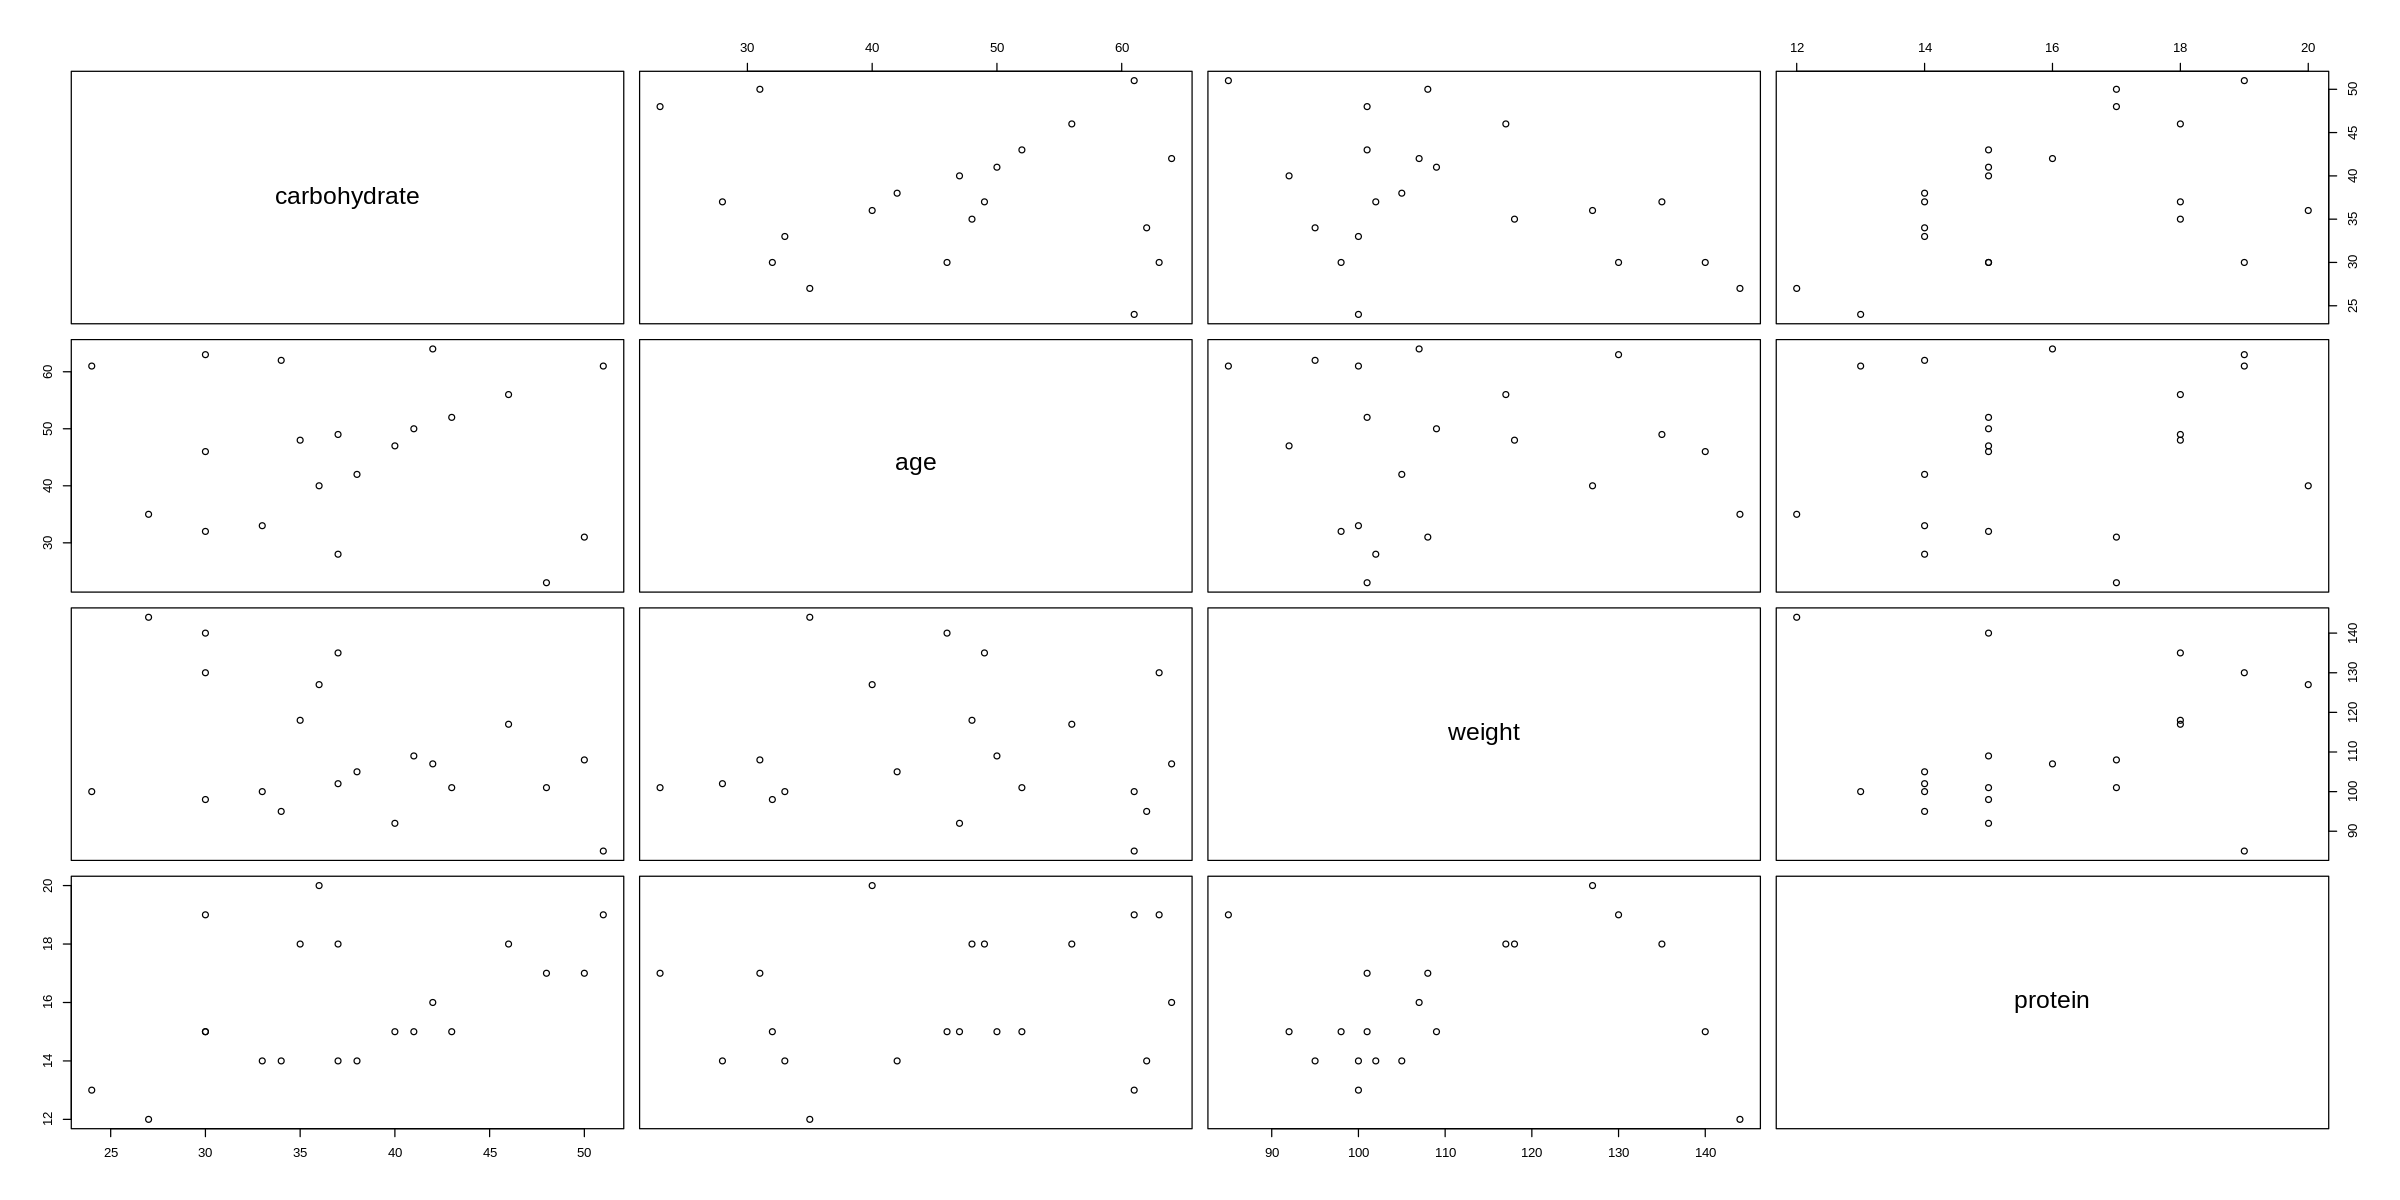

In [6]:
pairs(carb)

In [8]:
y <- carb$carbohydrate

# Model with all three covariates:
X <- as.matrix(cbind(rep(1, 20), carb[,2:4]))
t(X)%*%X

,"rep(1, 20)",age,weight,protein
"rep(1, 20)",20,923,2214,318
age,923,45697,102003,14780
weight,2214,102003,250346,35306
protein,318,14780,35306,5150


In [9]:
solve(t(X)%*%X)

,"rep(1, 20)",age,weight,protein
"rep(1, 20)",4.81577219,-1.134935e-02,-1.875498e-02,-0.1362153330
age,-0.01134935,3.368777e-04,1.887239e-05,-0.0003953918
weight,-0.01875498,1.887239e-05,1.955259e-04,-0.0002365220
protein,-0.13621533,-3.953918e-04,-2.365220e-04,0.0113613619


In [10]:
t(X)%*%y

"rep(1, 20)",752
age,34596
weight,82270
protein,12105


In [11]:
beta <- solve(t(X)%*%X)%*%t(X)%*%y
beta

"rep(1, 20)",36.9600559
age,-0.1136764
weight,-0.2280174
protein,1.9577126


In [12]:
# For residual sum of squares:
t(y)%*%y

29368


In [13]:
20*mean(y)^2

[1] 28275.2

In [17]:
b <- beta
t(b)%*% t(X)%*%y

28800.34


In [18]:
RSS <- t(y)%*%y-t(b)%*% t(X)%*%y
RSS

567.6629


In [19]:
sigmahatsq <- as.numeric(1/(20-4)*RSS)
sigmahatsq

[1] 35.47893

In [20]:
# Variance-covariance matrix of b:
Vcov <- solve(t(X)%*%X)*sigmahatsq

In [21]:
# Take square root to obtain standard errors:
sqrt(diag(Vcov))

rep(1, 20)         age      weight     protein 
13.07128293  0.10932548  0.08328895  0.63489286

In [22]:
################################
# Model without age:
X0 <- as.matrix(cbind(rep(1, 20), carb[,3:4]))
t(X0)%*%X0

,"rep(1, 20)",weight,protein
"rep(1, 20)",20,2214,318
weight,2214,250346,35306
protein,318,35306,5150


In [23]:
solve(t(X0)%*%X0)

,"rep(1, 20)",weight,protein
"rep(1, 20)",4.43341460,-0.0181191691,-0.1495360119
weight,-0.01811917,0.0001944686,-0.0002143716
protein,-0.14953601,-0.0002143716,0.0108972924


In [24]:
t(X0)%*%y

"rep(1, 20)",752
weight,82270
protein,12105


In [25]:
beta0 <- solve(t(X0)%*%X0)%*%t(X0)%*%y
beta0

"rep(1, 20)",33.130320
weight,-0.221649
protein,1.824291


In [26]:
# For residual sum of squares:
t(beta0)%*% t(X0)%*%y

28761.98


In [27]:
RSS0 <- t(y)%*%y-t(beta0)%*% t(X0)%*%y
RSS0

606.0219


In [28]:
sigmahatsq0 <- as.numeric(1/(20-3)*RSS0)
sigmahatsq0

[1] 35.64835

In [29]:
# Variance-covariance matrix of b:
Vcov0 <- solve(t(X0)%*%X0)*sigmahatsq0

In [30]:
# Take square root to obtain standard errors:
sqrt(diag(Vcov0))

rep(1, 20)      weight     protein 
12.57155155  0.08326155  0.62327400

In [32]:
# F-test comparing model without age to model including age:
F <- ((RSS0-RSS)/(4-3))/(RSS/(20-4))
pf(F,1,16, lower=FALSE)

0.3138927


In [33]:
qf(p=0.95,1,16)

[1] 4.493998

In [34]:
# Using lm:
m1 <- lm(carbohydrate ~ age + weight+protein, data=carb)
summary(m1)


Call:
lm(formula = carbohydrate ~ age + weight + protein, data = carb)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3424  -4.8203   0.9897   3.8553   7.9087 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 36.96006   13.07128   2.828  0.01213 * 
age         -0.11368    0.10933  -1.040  0.31389   
weight      -0.22802    0.08329  -2.738  0.01460 * 
protein      1.95771    0.63489   3.084  0.00712 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.956 on 16 degrees of freedom
Multiple R-squared:  0.4805,	Adjusted R-squared:  0.3831 
F-statistic: 4.934 on 3 and 16 DF,  p-value: 0.01297


In [35]:
anova(m1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,3.817852,3.817852,0.107609,0.747136462
weight,1,183.979581,183.979581,5.185601,0.036859467
protein,1,337.339710,337.339710,9.508171,0.007121265
Residuals,16,567.662857,35.478929,NA,NA


In [36]:
# change the order in which we include variables in the model:
m1b <- lm(carbohydrate ~ weight+protein+age, data=carb)
anova(m1b)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
weight,1,181.37760,181.37760,5.112263,0.038044414
protein,1,305.40047,305.40047,8.607940,0.009730427
age,1,38.35907,38.35907,1.081179,0.313892706
Residuals,16,567.66286,35.47893,NA,NA


In [37]:
m0 <- lm(carbohydrate ~ weight+protein, data=carb)
summary(m0)


Call:
lm(formula = carbohydrate ~ weight + protein, data = carb)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6812  -3.9135   0.9464   4.0880   9.7948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 33.13032   12.57155   2.635  0.01736 * 
weight      -0.22165    0.08326  -2.662  0.01642 * 
protein      1.82429    0.62327   2.927  0.00941 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.971 on 17 degrees of freedom
Multiple R-squared:  0.4454,	Adjusted R-squared:  0.3802 
F-statistic: 6.827 on 2 and 17 DF,  p-value: 0.006661


In [38]:
anova(m0)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
weight,1,181.3776,181.37760,5.087967,0.037559713
protein,1,305.4005,305.40047,8.567030,0.009409071
Residuals,17,606.0219,35.64835,NA,NA


In [39]:
anova(m0,m1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,606.0219,NA,NA,NA,NA
2,16,567.6629,1,38.35907,1.081179,0.3138927


In [40]:
# Could also use the glm() function for these:
summary(glm(carbohydrate ~ age + weight+protein, data=carb, family="gaussian"))


Call:
glm(formula = carbohydrate ~ age + weight + protein, family = "gaussian", 
    data = carb)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-10.3424   -4.8203    0.9897    3.8553    7.9087  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 36.96006   13.07128   2.828  0.01213 * 
age         -0.11368    0.10933  -1.040  0.31389   
weight      -0.22802    0.08329  -2.738  0.01460 * 
protein      1.95771    0.63489   3.084  0.00712 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 35.47893)

    Null deviance: 1092.80  on 19  degrees of freedom
Residual deviance:  567.66  on 16  degrees of freedom
AIC: 133.67

Number of Fisher Scoring iterations: 2


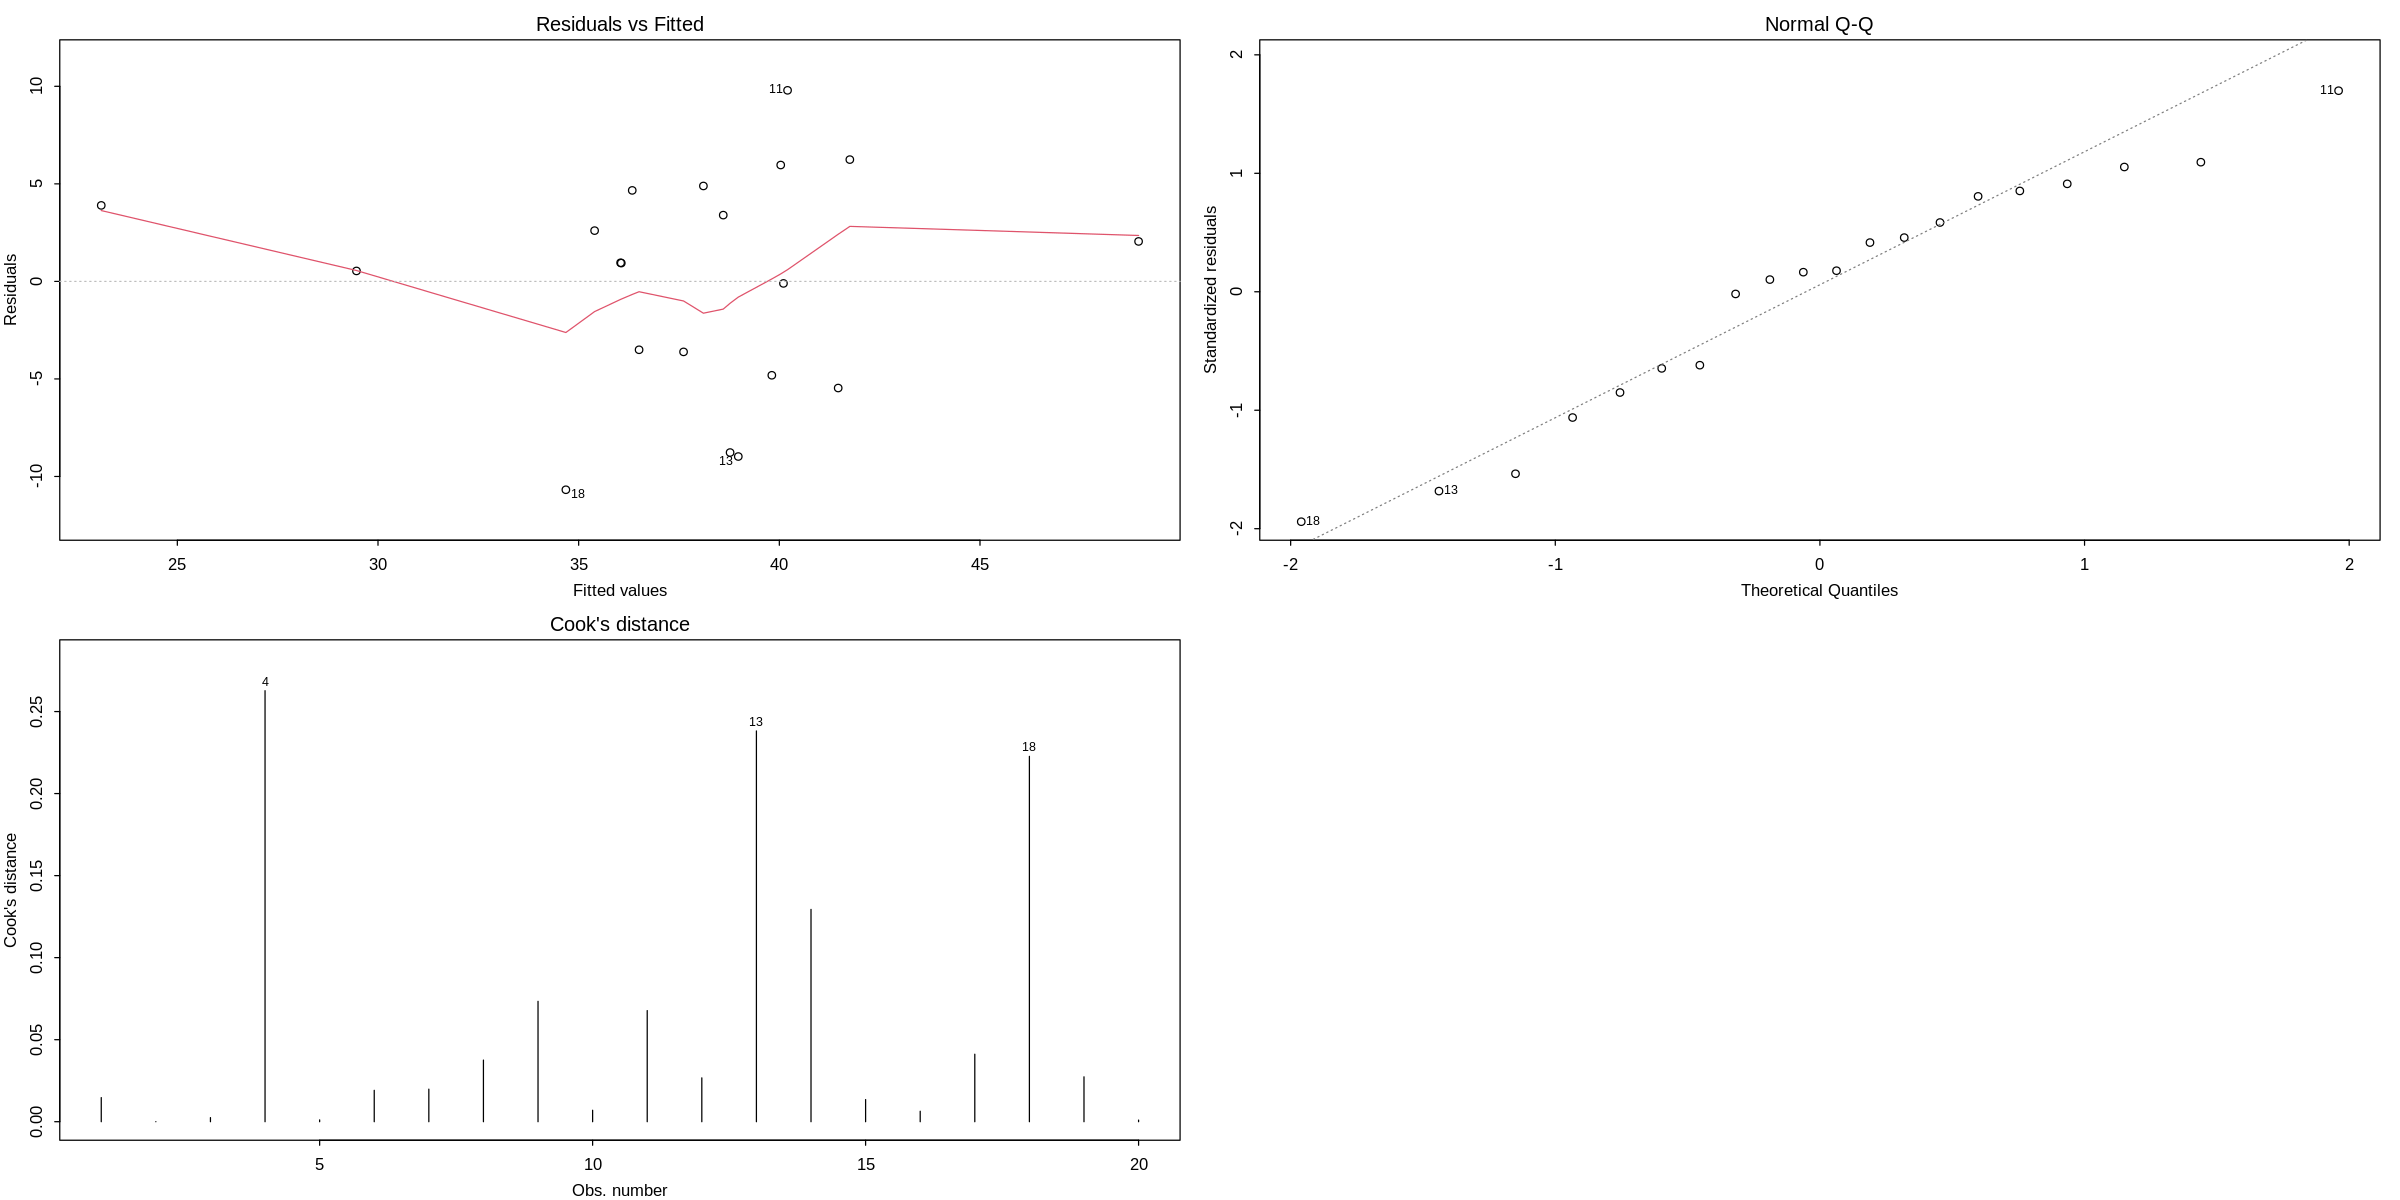

In [43]:
# Diagnostic plots:
par (mar=c(3,3,2,1), mgp=c(2,.7,0), tck=-.01)
#png("carb.png", width = 7, height = 5.5, units="in", res=1024)
par(mfrow=c(2,2))
plot(m0, which=c(1,2,4))
#dev.off()

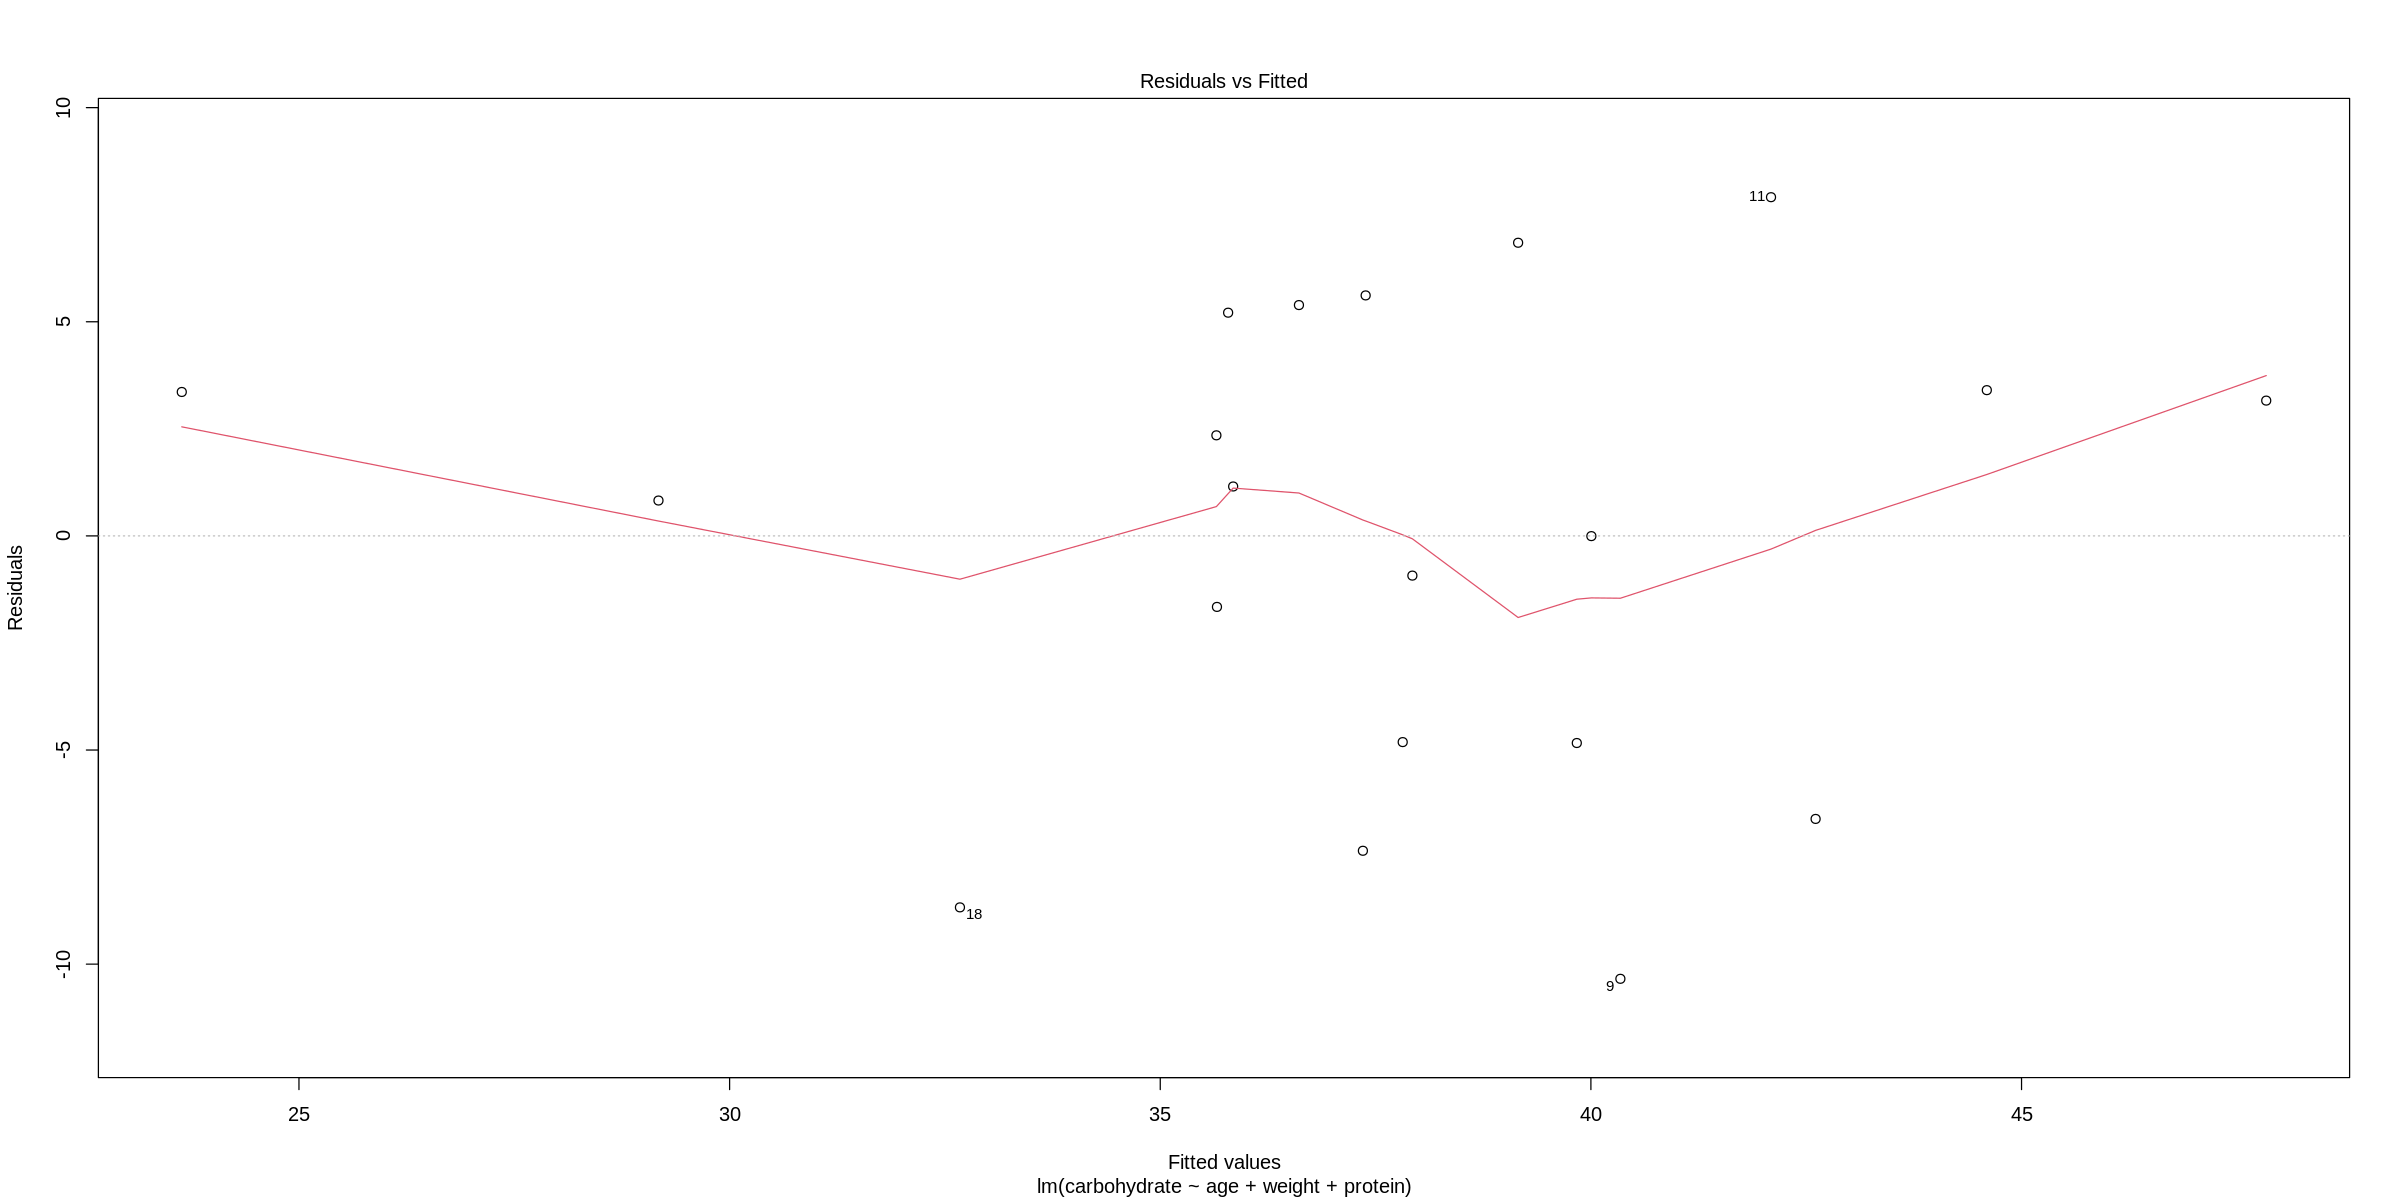

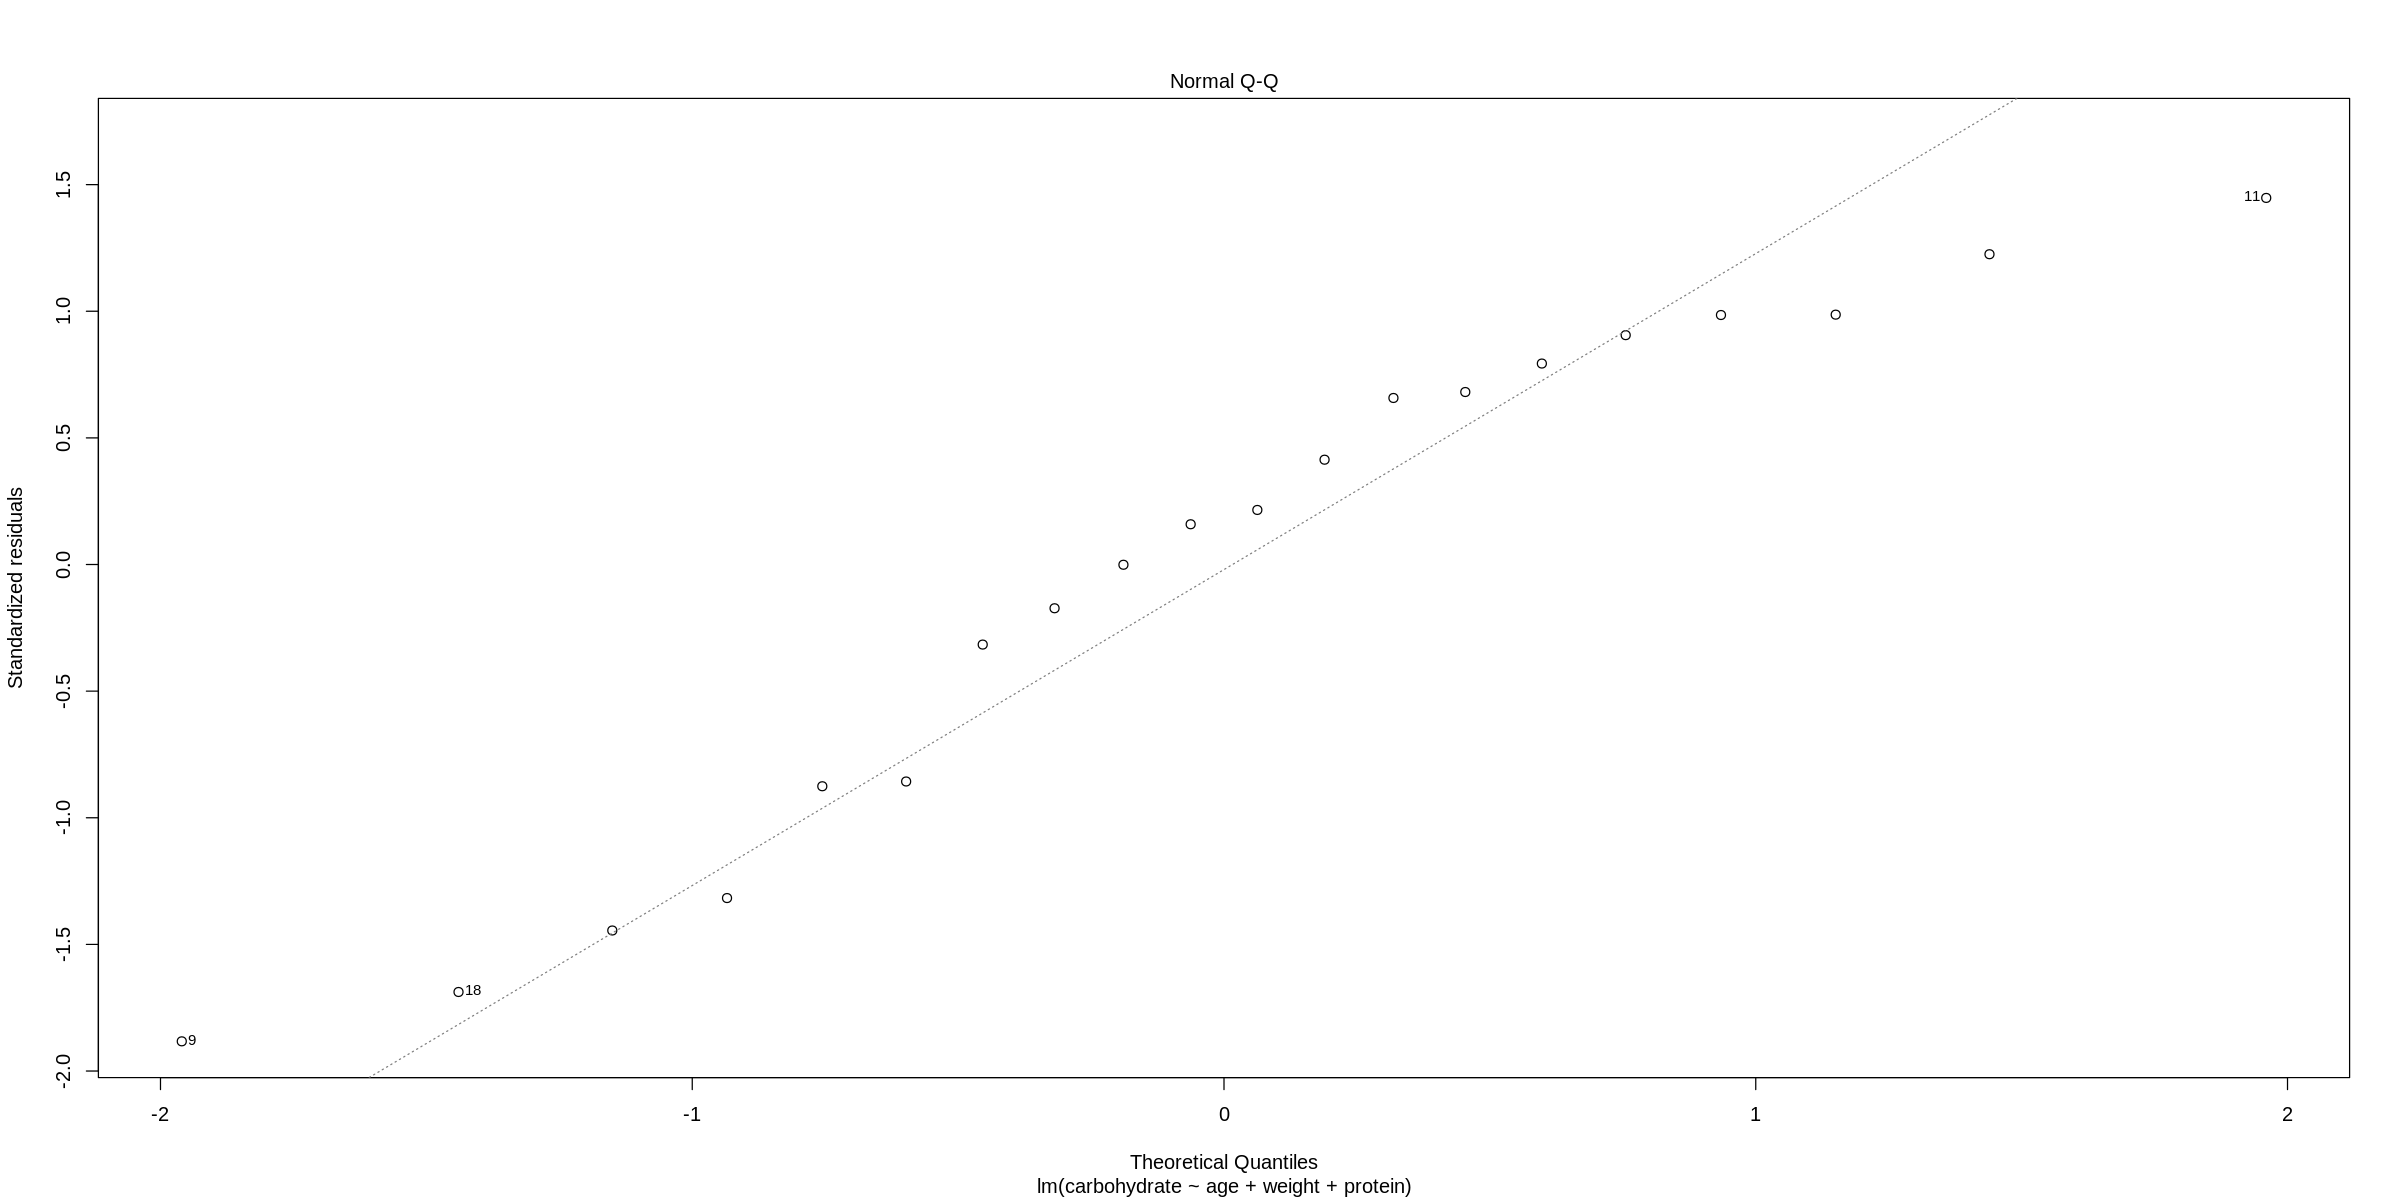

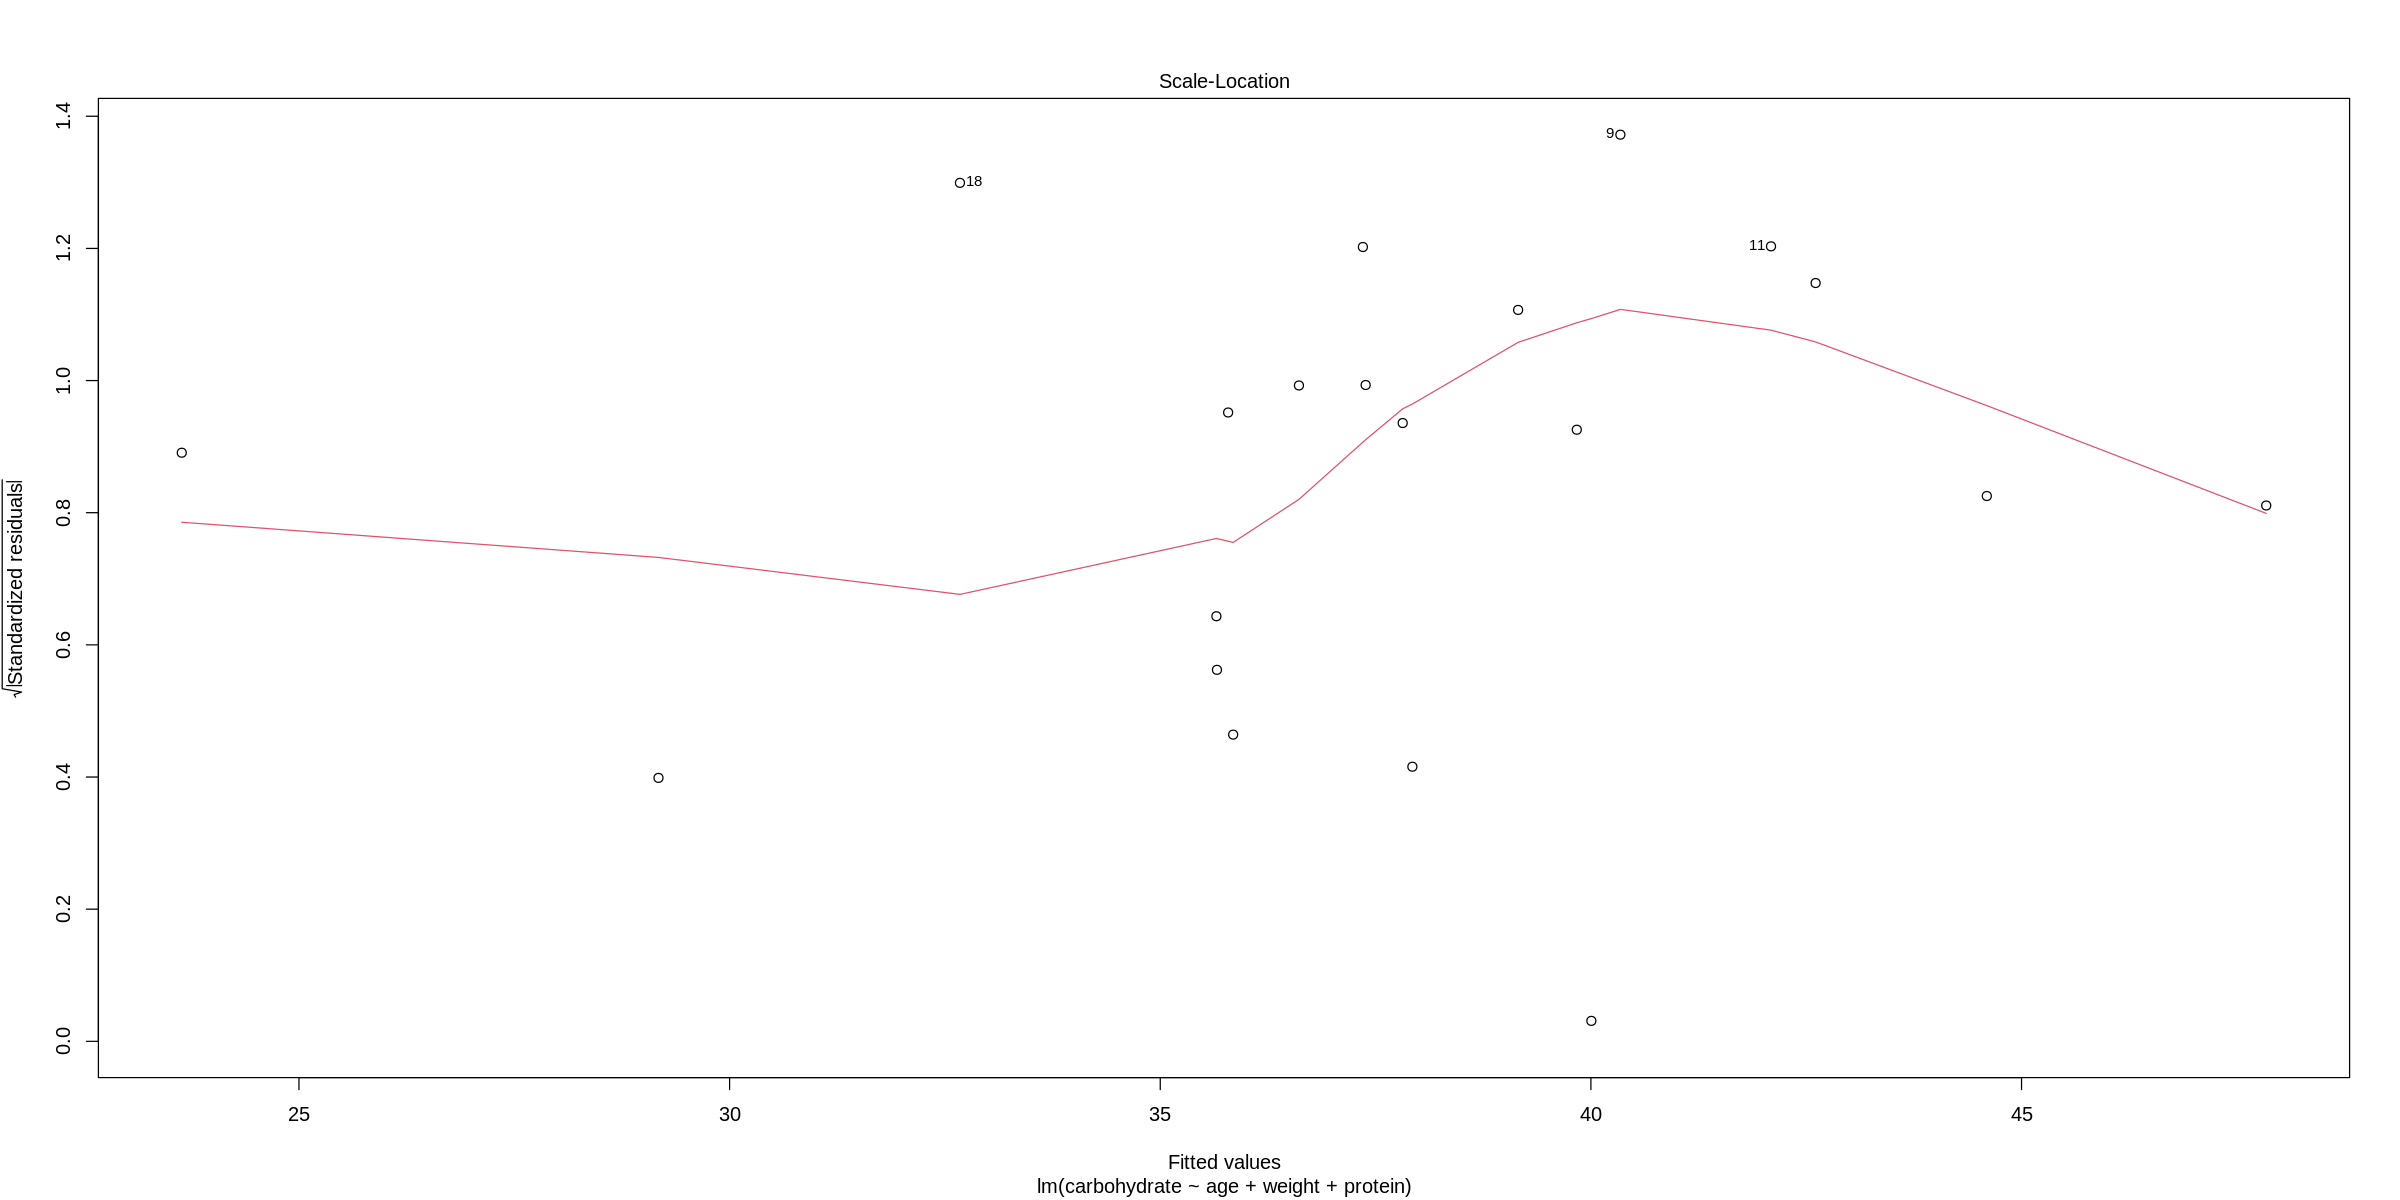

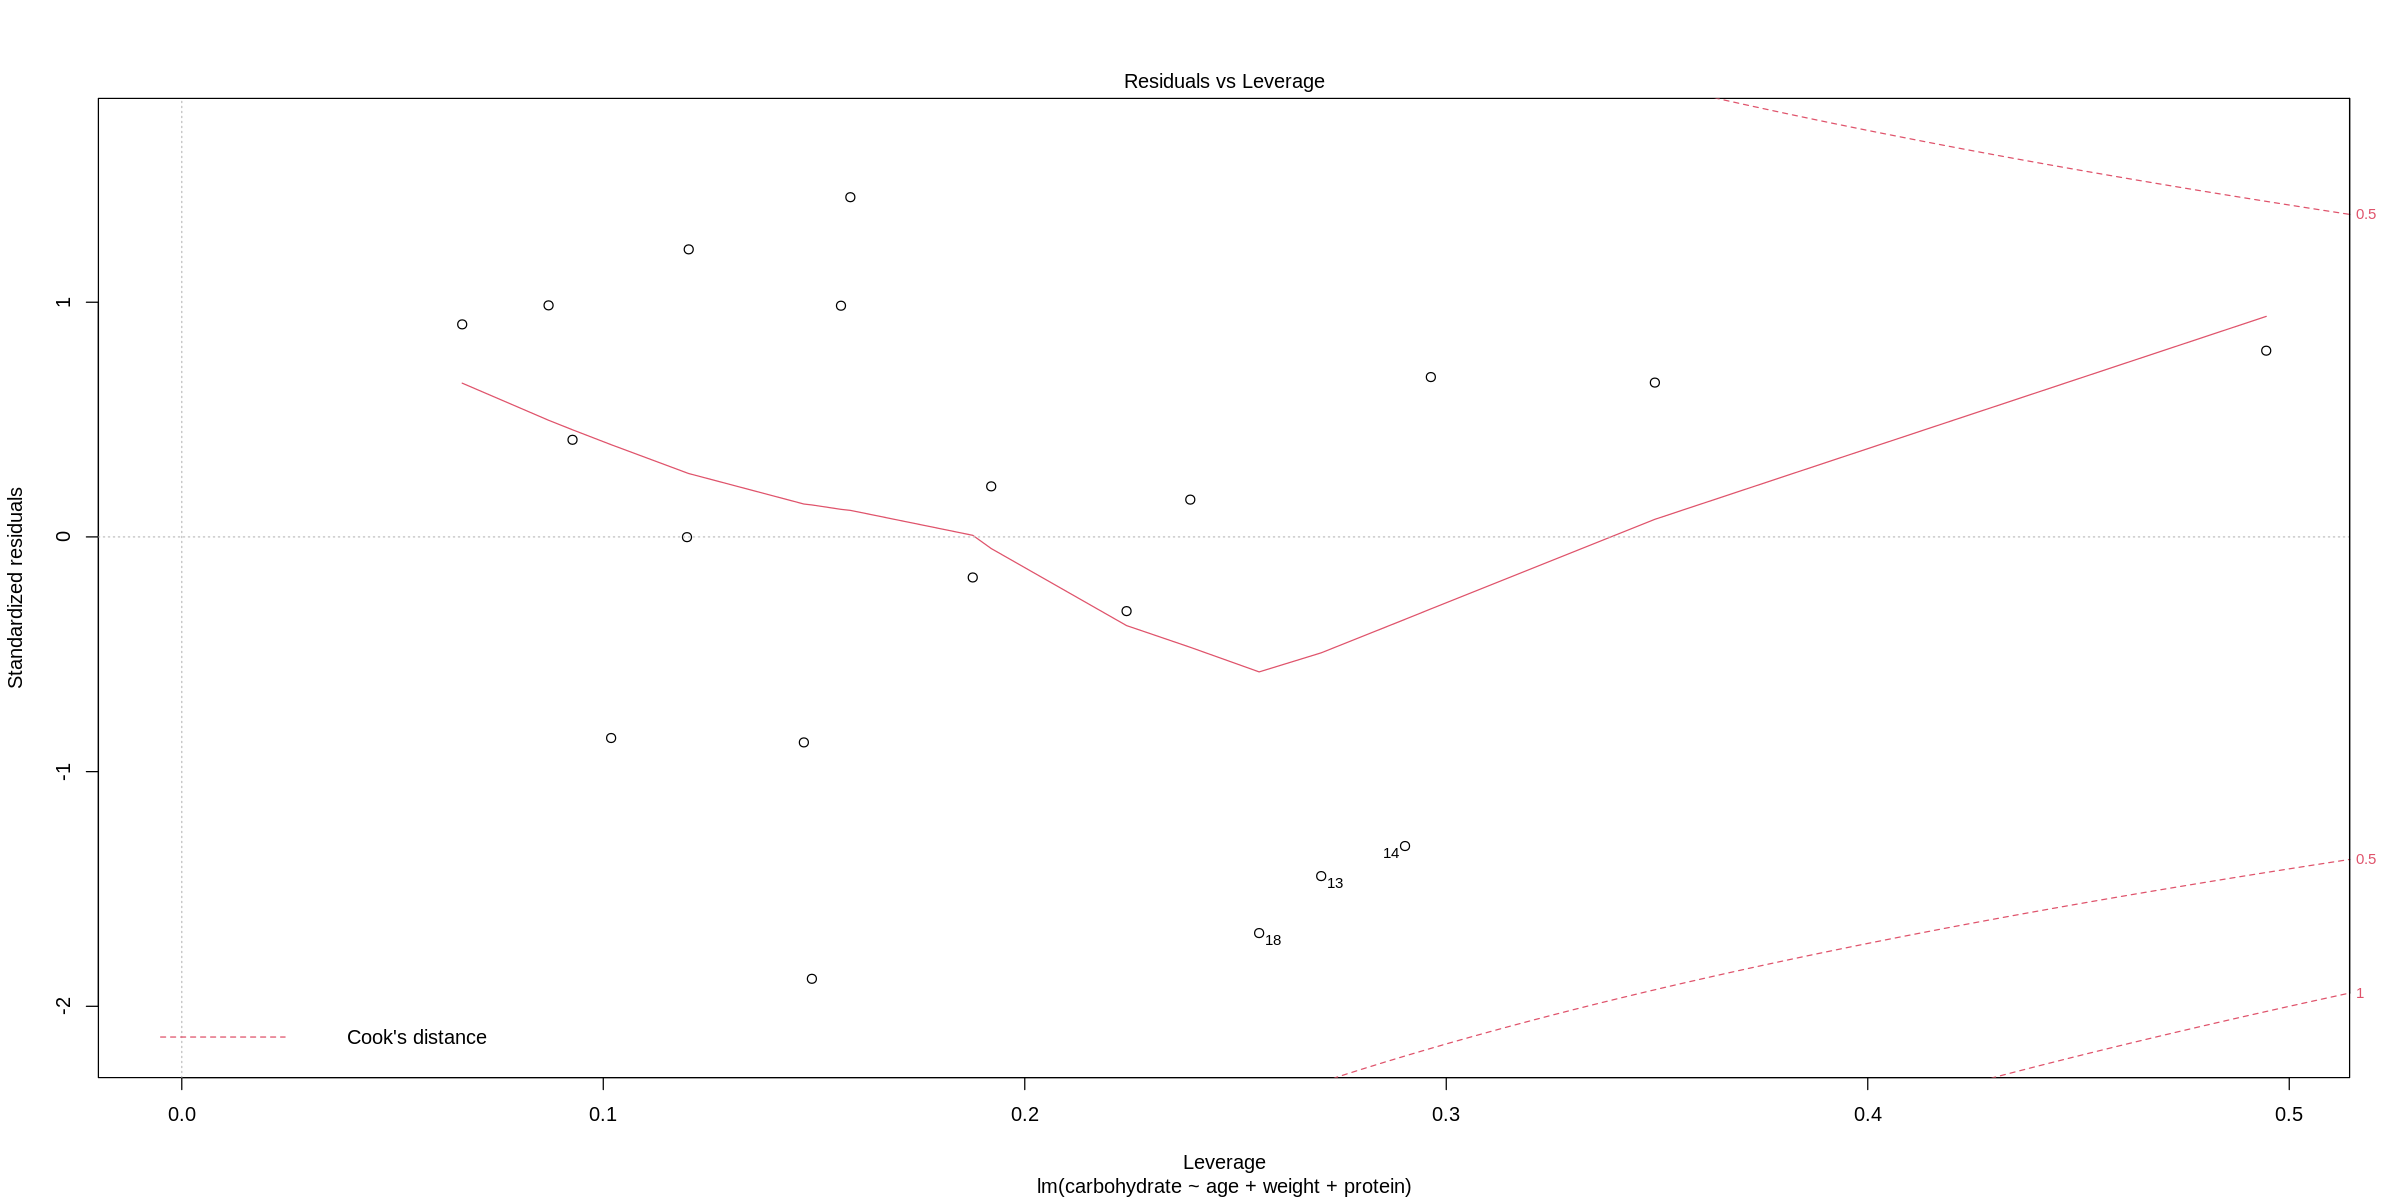

In [44]:
plot(m1)

In [45]:
# Can also compute various versions of the residuals and diagnostics for influential points as follows:
resid(m1)

1             2             3             4             5 
 -4.814975971  -0.005358449   1.153603108   3.360565803   0.825798562 
            6             7             8             9            10 
  5.615179589  -1.658448448   3.403140114 -10.342399622   2.348198044 
           11            12            13            14            15 
  7.908672497   3.159138722  -7.352727284  -6.609048135   5.211965771 
           16            17            18            19            20 
  5.389687464   6.845025089  -8.674325424  -4.836368399  -0.927323029

In [46]:
rstandard(m1)

1            2            3            4            5            6 
-0.875557460 -0.000958912  0.215464450  0.793564985  0.158954662  0.986615402 
           7            8            9           10           11           12 
-0.316102825  0.681106020 -1.882771536  0.413880393  1.447513074  0.657593572 
          13           14           15           16           17           18 
-1.445104163 -1.317016074  0.905662154  0.985166155  1.225226538 -1.687905615 
          19           20 
-0.856766690 -0.172733564

In [47]:
dffits(m1)

1             2             3             4             5 
-0.3615233671 -0.0003426354  0.1018567848  0.7754295719  0.0863832522 
            6             7             8             9            10 
 0.3043291753 -0.1650278430  0.4343185915 -0.8662500088  0.1287867630 
           11            12            13            14            15 
 0.6527872111  0.4731363318 -0.9133473167 -0.8635609953  0.2403472639 
           16            17            18            19            20 
 0.4237698725  0.4607978657 -1.0563199753 -0.2860096361 -0.0804607107

In [48]:
cooks.distance(m1)

1            2            3            4            5            6 
3.318320e-02 3.130641e-08 2.758587e-03 1.540333e-01 1.986742e-03 2.319511e-02 
           7            8            9           10           11           12 
7.217096e-03 4.884358e-02 1.557704e-01 4.375589e-03 9.875380e-02 5.808208e-02 
          13           14           15           16           17           18 
1.934194e-01 1.773049e-01 1.461479e-02 4.498336e-02 5.131004e-02 2.445669e-01 
          19           20 
2.081296e-02 1.723161e-03

In [49]:
dfbetas(m1)

,(Intercept),age,weight,protein
1,-0.2824769419,1.989638e-01,0.1272552457,1.223328e-01
2,-0.0002316521,-1.559837e-05,0.0002425799,5.699353e-05
3,-0.0766987936,7.451038e-03,0.0716155733,3.703689e-02
4,0.0418277656,-9.526426e-02,0.5695864874,-4.942487e-01
5,-0.0301956810,8.258103e-03,0.0750056260,-2.832475e-02
6,0.1354497829,1.204828e-01,-0.1160779905,-9.914877e-02
7,-0.0672478374,-1.100431e-01,0.0578633288,7.894249e-02
8,0.1253643047,-3.658608e-01,-0.1479865792,1.792300e-01
9,-0.5833355647,5.676846e-01,0.4065451243,3.418976e-02
10,0.0892062168,-1.738489e-02,-0.0224884163,-7.380120e-02


In [50]:
# tabulated:
influence.measures(m1)

Influence measures of
	 lm(formula = carbohydrate ~ age + weight + protein, data = carb) :

      dfb.1_   dfb.age  dfb.wght  dfb.prtn     dffit cov.r   cook.d    hat inf
1  -0.282477  1.99e-01  0.127255  0.122333 -0.361523 1.248 3.32e-02 0.1476    
2  -0.000232 -1.56e-05  0.000243  0.000057 -0.000343 1.471 3.13e-08 0.1199    
3  -0.076699  7.45e-03  0.071616  0.037037  0.101857 1.584 2.76e-03 0.1920    
4   0.041828 -9.53e-02  0.569586 -0.494249  0.775430 2.181 1.54e-01 0.4945   *
5  -0.030196  8.26e-03  0.075006 -0.028325  0.086383 1.691 1.99e-03 0.2393    
6   0.135450  1.20e-01 -0.116078 -0.099149  0.304329 1.103 2.32e-02 0.0870    
7  -0.067248 -1.10e-01  0.057863  0.078942 -0.165028 1.627 7.22e-03 0.2242    
8   0.125364 -3.66e-01 -0.147987  0.179230  0.434319 1.635 4.88e-02 0.2963    
9  -0.583336  5.68e-01  0.406545  0.034190 -0.866250 0.559 1.56e-01 0.1495    
10  0.089206 -1.74e-02 -0.022488 -0.073801  0.128787 1.367 4.38e-03 0.0927    
11  0.091677 -4.99e-01 -0.125892  0.294